In [1]:
"""import bibliotek"""
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D #wartwy w sieci konwolucyjnej
from keras.utils import to_categorical
import numpy as np
np.random.seed(2018)

import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [3]:
"""wczytanie zbioru danych MNIST"""

(X_train, y_train), (X_test,y_test) = mnist.load_data()

#zbiot train
#60 000 tyle zdjęć
#28
#28 

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

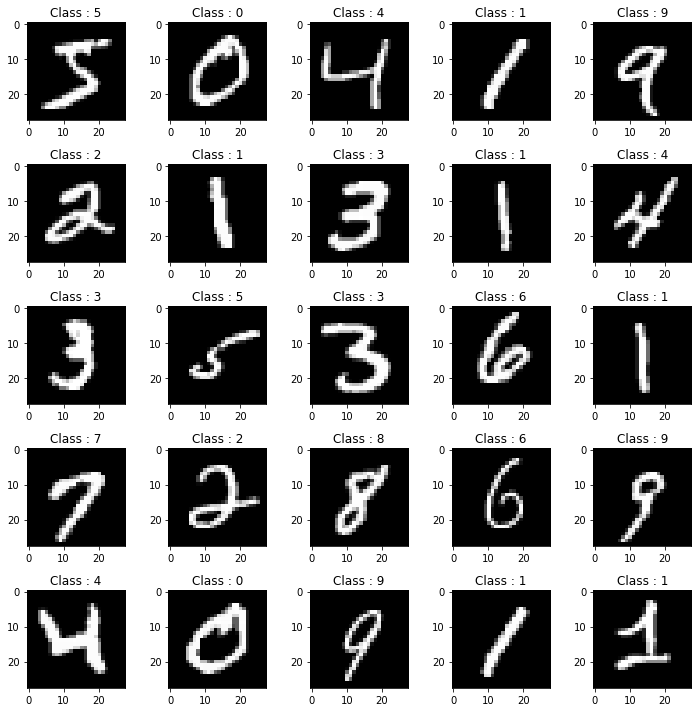

In [7]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5, idx+1) #idx +1 bo indeks w subplot jest od 1, a range od 0
    plt.imshow(X_train[idx], cmap ='gray') #gray kolor czarno biały
    plt.title('Class : {}'.format(y_train[idx]))

plt.tight_layout()

In [45]:
#rozmiar train
X_train.shape

(60000, 28, 28)

In [9]:
img_rows, img_cols = X_train.shape[1],X_train.shape[2]

#reshape
X_train = X_train.reshape(-1,img_rows,img_cols,1) # -1 mozna podac 60 000 ale -1 oblicza sam, 28,28, 1 kanał
X_test = X_test.reshape(-1,img_rows,img_cols,1) # -1 mozna podac 10 000 ale -1 oblicza sam, 28,28, 1 kanał

#rozmiar input + kanał
input_shape = (img_rows, img_cols,1)#1 oznacza kanał

X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
#normalizacja
if np.max(X_train)>1: X_train = X_train /255
if np.max(X_test)>1: X_test = X_test /255

In [15]:
#weryfikacja normzliazaji dla: 
# train
# test
X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [16]:
#to_categorical pokazuje prawdopodobienstwo jaka to classa
num_classes = len(set(y_train))
to_categorical(y_train ,num_classes)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
len(y_train.shape)

1

In [18]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train ,num_classes)
    y_test = to_categorical(y_test ,num_classes)

In [19]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
""" architektura modelu """
model = Sequential([
    Conv2D(filters = 32, kernel_size= (3,3),input_shape = input_shape),
    MaxPool2D(pool_size = (2,2)), #zmniejszamy 2 razy
    
    Conv2D(filters = 64, kernel_size= (3,3)),
    MaxPool2D(pool_size = (2,2)),  #zmniejszamy 2 razy
    
    Flatten(), #mostek przchodzi z jednej sieci do drugiej
    
    Dense(512,activation = 'relu'),
    Dense(num_classes,activation = 'softmax') #num_classes = 10 class, softmax = prawopodobienstwo
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

In [24]:
""" kompilacja modelu"""
# optymalizator adam, 
# metryka accuracy, 
# loss = klasyfikacja birnana w keras
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy']) 

## Trenowanie

In [27]:
#
model.fit(
    X_train,y_train,
    batch_size = 128,
    epochs = 5,
    validation_data=(X_test,y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0442 - val_acc: 0.9908
Epoch 2/5
60000/60000 [==============================] - 27s 457us/step - loss: 0.0062 - acc: 0.9982 - val_loss: 0.0417 - val_acc: 0.9906
Epoch 3/5
60000/60000 [==============================] - 27s 450us/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0521 - val_acc: 0.9889
Epoch 4/5
60000/60000 [==============================] - 28s 461us/step - loss: 0.0084 - acc: 0.9974 - val_loss: 0.0498 - val_acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 28s 470us/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0442 - val_acc: 0.9915


## Testowanie

In [28]:
score = model.evaluate (X_test,y_test, verbose=0)

In [29]:
#accuracy = 99% tylko na 1 obrazku myslimy się
score

[0.04420369824405211, 0.9915]